In [117]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import numpy as np
import pandas as pd
import re
import json
import glob
import spacy

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim
import pandas as pd
from bertopic import BERTopic

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [118]:
import os
import random
import numpy as np
import tensorflow as tf  # if you are using tensorflow

In [119]:
os.environ['PYTHONHASHSEED'] = '0'
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [120]:
import rpy2.robjects as robjects

readRDS = robjects.r['readRDS']
dtm_r = readRDS("clean_dtm.rds")
print(dtm_r)

$i
    [1]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   [19]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   [37]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   [55]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   [73]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   [91]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
  [109]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
  [127]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
  [145]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
  [163]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
  [181]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
  [199]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
  [217]   1   1   1   1   1   1   1  

In [121]:
from scipy.sparse import coo_matrix

# Your data extraction code here
rows = [x - 1 for x in list(dtm_r.rx2('i'))]
cols = [x - 1 for x in list(dtm_r.rx2('j'))]
data = list(dtm_r.rx2('v'))
nrow = int(dtm_r.rx2('nrow')[0])
ncol = int(dtm_r.rx2('ncol')[0])
terms = list(dtm_r.rx2('dimnames')[1])
docs = list(dtm_r.rx2('dimnames')[0])

# Create sparse matrix and convert to dense array
mtx = coo_matrix((data, (rows, cols)), shape=(nrow, ncol)).toarray()

# Create DataFrame
df = pd.DataFrame(mtx, columns=terms, index=docs)


In [123]:
def row_to_text(row):
    words = []
    for col, count in row.items():
        try:
            repetitions = int(count)
        except (ValueError, TypeError):
            repetitions = 0
        if repetitions > 0:
            words.extend([col]*repetitions)
    return ' '.join(words)

texts = df.apply(row_to_text, axis=1).tolist()


In [124]:
os.environ['PYTHONHASHSEED'] = '0'
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [125]:
# from bertopic import BERTopic
# from sklearn.cluster import KMeans
# from sentence_transformers import SentenceTransformer

# # Step 1: Embed documents
# embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
# embeddings = embedding_model.encode(texts, show_progress_bar=True)

# # Step 2: Run KMeans to create exactly 10 topics
# kmeans_model = KMeans(n_clusters=9, random_state=42)
# predicted_topics = kmeans_model.fit_predict(embeddings)

# # Step 3: Fit BERTopic in "offline mode" using your clusters
# topic_model = BERTopic(
#     language="english",
#     nr_topics=None,       # No reduction, keep your 10 clusters
#     verbose=True
# )

# topic_model.fit(texts, embeddings=embeddings, y=predicted_topics)

# # Step 4: View topics
# print(topic_model.get_topic_info())

# # Top words
# for i in range(9):
#     print(f"Topic {i}:", topic_model.get_topic(i))


In [126]:
# from bertopic import BERTopic
# from sklearn.cluster import KMeans
# from sentence_transformers import SentenceTransformer
# import numpy as np

# # Step 1: Embed documents
# embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
# embeddings = embedding_model.encode(texts, show_progress_bar=True)

# # Step 2: Run KMeans to create exactly 9 topics
# kmeans_model = KMeans(n_clusters=9, random_state=42)
# predicted_topics = kmeans_model.fit_predict(embeddings)

# # Step 3: Replace all -1 labels in predicted_topics with a valid cluster (e.g., 0)
# # Usually KMeans doesn't create -1, but this is a safeguard if needed
# predicted_topics = np.where(predicted_topics == -1, 0, predicted_topics)

# # Step 4: Fit BERTopic in "offline mode" using your clusters
# topic_model = BERTopic(
#     language="english",
#     nr_topics=11,      # Force model to use exactly 9 topics
#     verbose=True
# )

# # Fit and get topics/probabilities using the predicted topics as y
# topics, probs = topic_model.fit_transform(
#     texts, embeddings=embeddings, y=predicted_topics
# )

# # Print topic info and distribution
# print(topic_model.get_topic_info())

# for i in range(10):
#     print(f"Topic {i}:", topic_model.get_topic(i))


In [127]:
from bertopic import BERTopic
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer

# Step 1: Embed documents
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(texts, show_progress_bar=True)

# Step 2: Run KMeans to create exactly 9 topics (consistent with the rest of your code)
kmeans_model = KMeans(n_clusters=9, random_state=42)
predicted_topics = kmeans_model.fit_predict(embeddings)

# Step 3: Fit BERTopic in "offline mode" using your clusters
topic_model = BERTopic(
    language="english",
    nr_topics=None,    # No reduction, keep your 9 clusters
    verbose=True
)

# Fit and get topics/probabilities
topics, probs = topic_model.fit_transform(
    texts, embeddings=embeddings, y=predicted_topics
)

# Step 4: View topics
print(topic_model.get_topic_info())

# Top words per topic
for i in range(9):
    print(f"Topic {i}:", topic_model.get_topic(i))

# topics = list of assigned topic labels for texts
# probs = list of probabilities for topic assignments per text


Batches:   0%|          | 0/158 [00:00<?, ?it/s]

2025-11-06 12:13:07,907 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-06 12:13:09,873 - BERTopic - Dimensionality - Completed ✓
2025-11-06 12:13:09,874 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-06 12:13:09,959 - BERTopic - Cluster - Completed ✓
2025-11-06 12:13:09,963 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-06 12:13:10,678 - BERTopic - Representation - Completed ✓


    Topic  Count                                         Name  \
0      -1      7                          -1_rep_yea_vote_nay   
1       0    843                  0_animal_wolf_wildlife_year   
2       1    724              1_wildlife_fish_federal_service   
3       2    648                2_federal_wildlife_us_service   
4       3    621                 3_water_fish_california_year   
5       4    597  4_environmental_federal_year_administration   
6       5    526              5_california_fish_water_federal   
7       6    425                   6_court_state_case_justice   
8       7    376                      7_bear_alaska_wolf_year   
9       8    259           8_environmental_year_activist_land   
10      9     28                            9_am_subc_rhob_pm   

                                                                                  Representation  \
0                     [rep, yea, vote, nay, shale, entitlement, house, oil, steamtown, research]   
1                  

In [128]:
# from bertopic import BERTopic

# # Fit BERTopic
# topic_model = BERTopic(language="english", nr_topics=11, verbose=True)
# topics, probs = topic_model.fit_transform(texts)

# # Show summary of discovered topics
# print(topic_model.get_topic_info())

# # Get top words per topic
# for i in range(10):
#     print(f"Topic {i}:", topic_model.get_topic(i))


In [129]:
# Get a DataFrame of the topic info (includes keywords as a string)
topic_info = topic_model.get_topic_info()

# For more detailed keywords (e.g., list of tokens with weights), you can extract like this:
topic_keywords = []
for topic_num in topic_info['Topic']:
    if topic_num == -1:  # skip outlier topic
        continue
    keywords = topic_model.get_topic(topic_num)
    # Get just the word list
    word_list = [kw[0] for kw in keywords]
    # Save topic number, full keyword string, and/or list
    topic_keywords.append({'Topic': topic_num, 'keywords': ', '.join(word_list)})

# Make a DataFrame and save to CSV
keywords_df = pd.DataFrame(topic_keywords)
#keywords_df.to_csv("wildlife_bertopic_keywords.csv", index=False)


In [130]:
keywords_df.head

<bound method NDFrame.head of    Topic  \
0      0   
1      1   
2      2   
3      3   
4      4   
5      5   
6      6   
7      7   
8      8   
9      9   

                                                                                     keywords  
0                     animal, wolf, wildlife, year, state, population, fish, bird, kill, park  
1                  wildlife, fish, federal, service, agency, habitat, list, plan, state, year  
2            federal, wildlife, us, service, fish, protect, list, protection, threaten, court  
3                 water, fish, california, year, river, state, salmon, federal, habitat, plan  
4  environmental, federal, year, administration, agency, state, house, water, law, government  
5              california, fish, water, federal, state, wildlife, san, year, service, habitat  
6               court, state, case, justice, republican, law, judge, federal, vote, president  
7                        bear, alaska, wolf, year, polar, state, fish

In [131]:
import pandas as pd

# Get a flat dataframe: topic number, single keyword, and its weight
records = []
for topic_num in topic_model.get_topic_info()['Topic']:
    if topic_num == -1:
        continue  # Skip outlier topic
    for kw, wt in topic_model.get_topic(topic_num):
        records.append({
            "topic": topic_num,
            "keyword": kw,
            "weight": wt
        })

bertopic_keywords_df = pd.DataFrame(records)
bertopic_keywords_df.to_csv("wildlife_bertopic_keywords_with_weights_01.csv", index=False)


In [132]:
print(bertopic_keywords_df)

    topic         keyword    weight
0       0          animal  0.029024
1       0            wolf  0.026102
2       0        wildlife  0.021633
3       0            year  0.019916
4       0           state  0.016953
5       0      population  0.015129
6       0            fish  0.014504
7       0            bird  0.013361
8       0            kill  0.012999
9       0            park  0.012967
10      1        wildlife  0.028754
11      1            fish  0.026670
12      1         federal  0.023288
13      1         service  0.022850
14      1          agency  0.021566
15      1         habitat  0.021540
16      1            list  0.021022
17      1            plan  0.020217
18      1           state  0.019749
19      1            year  0.017866
20      2         federal  0.028380
21      2        wildlife  0.025737
22      2              us  0.024894
23      2         service  0.024346
24      2            fish  0.022187
25      2         protect  0.020700
26      2            list  0

In [133]:
#topics, probs = topic_model.transform(texts)

In [134]:
# import pandas as pd

# # Assuming you already have:
# # docs = list of GOIDs or document IDs
# # texts = list of document texts corresponding to docs

# # Step 1: Get topic assignments for each document
# #topics, probs = topic_model.transform(texts)  # topics is a list of topic IDs

# # Step 2: Create a dataframe mapping each GOID to its assigned topic
# doc_topic_df = pd.DataFrame({'GOID': docs, 'Topic': topics})

# # Step 3: Optional: group GOIDs by topic
# topic_to_docs = doc_topic_df.groupby('Topic')['GOID'].apply(list).to_dict()

# # Step 4: Optional: add topic labels for readability
# topic_info = topic_model.get_topic_info()  # Contains topic names/labels
# topic_labels = {row['Topic']: row['Name'] for _, row in topic_info.iterrows()}

# doc_topic_df['Topic_Label'] = doc_topic_df['Topic'].map(topic_labels)

# # Print results
# print(doc_topic_df)
# print(topic_to_docs)


In [135]:
#Mapping topics back to GOIDs (document IDs
doc_topic_df = pd.DataFrame({'GOID': docs, 'Topic': topics})

In [136]:
# 1. Create a dataframe mapping each document to its topic
doc_topic_df = pd.DataFrame({'GOID': docs, 'Topic': topics})

In [137]:
# View first 5 mappings
print(doc_topic_df.head())

        GOID  Topic
0  423968056      6
1  423987935      6
2  423991776      3
3  424019341      2
4  424018521      0


In [138]:
# Assuming your DataFrame name is df, with columns "GOID" and "Topic"

topic_counts = doc_topic_df.groupby('Topic')['GOID'].count().reset_index(name='DocumentCount')

print(topic_counts)


    Topic  DocumentCount
0      -1              7
1       0            843
2       1            724
3       2            648
4       3            621
5       4            597
6       5            526
7       6            425
8       7            376
9       8            259
10      9             28


In [139]:
doc_topic_df.shape

(5054, 2)

In [140]:
doc_topic_df.to_csv('document_topic_mapping.csv', index=False)

In [141]:
#document_topic_mapping.csv

import pandas as pd

# Load the CSV file into a DataFrame
doc_topic_df = pd.read_csv('document_topic_mapping.csv')

# Display the first few rows to verify import
print(doc_topic_df.head())


        GOID  Topic
0  423968056      6
1  423987935      6
2  423991776      3
3  424019341      2
4  424018521      0


In [142]:
# num_outlier_docs = (doc_topic_df['Topic'] == -1).sum()
# print(f"Number of documents assigned to outlier topic (-1): {num_outlier_docs}")

In [143]:
#trying to make the keyword weights sum to 1
# Get weighted keywords for a specific topic
# topic_id = 0
# weighted_keywords = topic_model.get_topic(topic_id)
# print(weighted_keywords)
# Output contains (word, weight) tuples where weights sum to 1


i want to do comparison

In [144]:
stm_words = pd.read_csv("news_stm_topic_keywords_with_weights.csv")
print(stm_words)

    topic         keyword    weight
0       1           water  0.041614
1       1           river  0.022201
2       1            fish  0.021578
3       1          salmon  0.019609
4       1            year  0.012008
5       1             dam  0.011465
6       1      california  0.010442
7       1           state  0.010006
8       1         federal  0.009816
9       1          farmer  0.008259
10     10            land  0.013214
11     10            park  0.007757
12     10          forest  0.007734
13     10            tree  0.007701
14     10            area  0.006994
15     10            year  0.006427
16     10            fire  0.005773
17     10          people  0.005555
18     10        mountain  0.005096
19     10           plant  0.005005
20      2             sea  0.011199
21      2           whale  0.010340
22      2            year  0.008923
23      2            fish  0.007018
24      2          turtle  0.006675
25      2          marine  0.006043
26      2            time  0

In [145]:
#To check the topic and see the weights of the keywords
filtered_topic = stm_words[stm_words['topic'] == 1]
print(filtered_topic)


   topic     keyword    weight
0      1       water  0.041614
1      1       river  0.022201
2      1        fish  0.021578
3      1      salmon  0.019609
4      1        year  0.012008
5      1         dam  0.011465
6      1  california  0.010442
7      1       state  0.010006
8      1     federal  0.009816
9      1      farmer  0.008259


In [146]:
#did this so that i can use it for the cosine similarity
# Group keywords by topic, using set for easy overlap checking
stm_topics = []
for topic, group in stm_words.groupby('topic'):
    keywords = set(group['keyword'])
    stm_topics.append({'topic': topic, 'keywords': keywords})

print(stm_topics[:5])  # Shows the first 5 topics in your desired format


[{'topic': 1, 'keywords': {'salmon', 'water', 'farmer', 'fish', 'state', 'dam', 'federal', 'year', 'river', 'california'}}, {'topic': 2, 'keywords': {'water', 'whale', 'fish', 'otter', 'sea', 'butterfly', 'year', 'marine', 'time', 'turtle'}}, {'topic': 3, 'keywords': {'senate', 'house', 'state', 'congress', 'environmental', 'republican', 'bill', 'vote', 'year', 'clinton'}}, {'topic': 4, 'keywords': {'year', 'state', 'bear', 'wolf', 'animal', 'park', 'kill', 'hunt', 'grizzly', 'wildlife'}}, {'topic': 5, 'keywords': {'protect', 'fish', 'agency', 'service', 'federal', 'protection', 'threaten', 'wildlife', 'habitat', 'list'}}]


In [147]:
bert_words = pd.read_csv("wildlife_bertopic_keywords_with_weights_01.csv")
print(bert_words)

    topic         keyword    weight
0       0          animal  0.029024
1       0            wolf  0.026102
2       0        wildlife  0.021633
3       0            year  0.019916
4       0           state  0.016953
5       0      population  0.015129
6       0            fish  0.014504
7       0            bird  0.013361
8       0            kill  0.012999
9       0            park  0.012967
10      1        wildlife  0.028754
11      1            fish  0.026670
12      1         federal  0.023288
13      1         service  0.022850
14      1          agency  0.021566
15      1         habitat  0.021540
16      1            list  0.021022
17      1            plan  0.020217
18      1           state  0.019749
19      1            year  0.017866
20      2         federal  0.028380
21      2        wildlife  0.025737
22      2              us  0.024894
23      2         service  0.024346
24      2            fish  0.022187
25      2         protect  0.020700
26      2            list  0

In [148]:
filtered_topic_bertopic = bert_words[bert_words['topic'] == 0]
print(filtered_topic_bertopic)

   topic     keyword    weight
0      0      animal  0.029024
1      0        wolf  0.026102
2      0    wildlife  0.021633
3      0        year  0.019916
4      0       state  0.016953
5      0  population  0.015129
6      0        fish  0.014504
7      0        bird  0.013361
8      0        kill  0.012999
9      0        park  0.012967


In [149]:
# Group keywords by topic, using set for easy overlap checking
bertopic_topics = []
for topic, group in bert_words.groupby('topic'):
    keywords = set(group['keyword'])
    bertopic_topics.append({'topic': topic, 'keywords': keywords})

print(bertopic_topics[:5])  # Shows the first 5 topics in your desired format

[{'topic': 0, 'keywords': {'state', 'fish', 'bird', 'wolf', 'animal', 'population', 'park', 'kill', 'year', 'wildlife'}}, {'topic': 1, 'keywords': {'fish', 'plan', 'state', 'agency', 'service', 'federal', 'year', 'wildlife', 'habitat', 'list'}}, {'topic': 2, 'keywords': {'protect', 'fish', 'us', 'service', 'federal', 'protection', 'court', 'threaten', 'wildlife', 'list'}}, {'topic': 3, 'keywords': {'salmon', 'water', 'fish', 'state', 'plan', 'federal', 'year', 'river', 'habitat', 'california'}}, {'topic': 4, 'keywords': {'law', 'water', 'house', 'state', 'agency', 'administration', 'government', 'federal', 'environmental', 'year'}}]


In [150]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

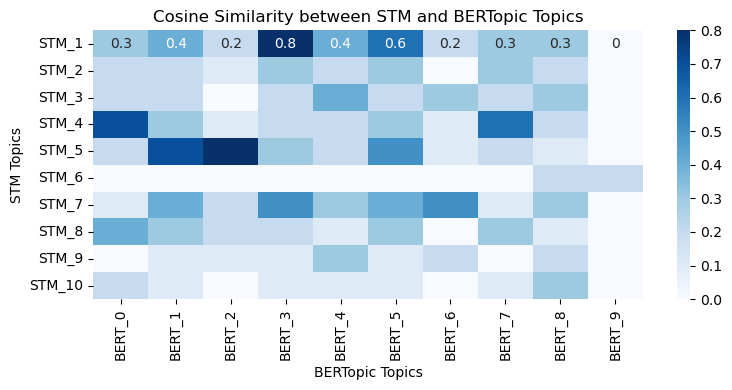

In [151]:
# 1. Unified vocabulary
all_keywords = set()
for t in stm_topics + bertopic_topics:
    all_keywords |= t['keywords']
vocab = sorted(all_keywords)

# 2. Vectorize topics
def to_vector(topic_keywords, vocab):
    return [1 if kw in topic_keywords else 0 for kw in vocab]
stm_vectors = np.array([to_vector(t['keywords'], vocab) for t in stm_topics])
bert_vectors = np.array([to_vector(t['keywords'], vocab) for t in bertopic_topics])

# 3. Compute cosine similarity
similarity_matrix = cosine_similarity(stm_vectors, bert_vectors)

# 4. Plot heatmap
plt.figure(figsize=(8,4))
sns.heatmap(similarity_matrix, annot=True, xticklabels=[f"BERT_{t['topic']}" for t in bertopic_topics], 
            yticklabels=[f"STM_{t['topic']}" for t in stm_topics], cmap="Blues")
plt.title("Cosine Similarity between STM and BERTopic Topics")
plt.xlabel("BERTopic Topics")
plt.ylabel("STM Topics")
plt.tight_layout()
plt.show()

In [152]:
# Group keywords by topic, using set for easy overlap checking
stm_topics = []
for topic, group in stm_words.groupby('topic'):
    keywords = set(group['keyword'])
    stm_topics.append({'topic': topic, 'keywords': keywords})

print(stm_topics[:5])  # Shows the first 5 topics in your desired format

[{'topic': 1, 'keywords': {'salmon', 'water', 'farmer', 'fish', 'state', 'dam', 'federal', 'year', 'river', 'california'}}, {'topic': 2, 'keywords': {'water', 'whale', 'fish', 'otter', 'sea', 'butterfly', 'year', 'marine', 'time', 'turtle'}}, {'topic': 3, 'keywords': {'senate', 'house', 'state', 'congress', 'environmental', 'republican', 'bill', 'vote', 'year', 'clinton'}}, {'topic': 4, 'keywords': {'year', 'state', 'bear', 'wolf', 'animal', 'park', 'kill', 'hunt', 'grizzly', 'wildlife'}}, {'topic': 5, 'keywords': {'protect', 'fish', 'agency', 'service', 'federal', 'protection', 'threaten', 'wildlife', 'habitat', 'list'}}]


In [153]:
metadata = pd.read_csv("meta.csv")
metadata.head(1)

,GOID,Title,Date,Source Type,Authors,Publication ID,Publication Title,Publisher City,Publisher Province,Publisher Name,Publisher ZipCode,Object Type,Language,Pages,Start Page,Company Name,Company NAIC,Class Terms,Subject Terms
0,433375738,Park Service To Emphasize Conservation In New Rules,2006-08-31,Newspapers,"['Barringer, Felicity']",11561,New York Times,NEW YORK,NY,New York Times Company,10018.0,Articles - All Types,English,0.0,A.16,['National Park Service-US'],['924120'],NaN,"['Conservation', 'Recreation industry', 'Environmental policy']"


In [154]:
metadata.shape

(5241, 19)

In [155]:
columns_to_keep = ['GOID', 'Date']

# Create a new DataFrame with only these columns
new_df = metadata[columns_to_keep]

print(new_df.head())

        GOID        Date
0  433375738  2006-08-31
1  433422646  2006-10-31
2  433462991  2006-12-28
3  433470077  2006-12-11
4  433481259  2007-01-30


In [156]:
stm_gamma = pd.read_csv("stm_gamma.csv")
stm_gamma.head(2)

,Unnamed: 0,GOID,topic,gamma
0,1,423968056,1,0.002298
1,2,423987935,1,0.001456


In [157]:
stm_gamma.shape

(50540, 4)

In [158]:
#i wanted to filter and check how many topics each GOID has
filtered_row = stm_gamma[stm_gamma['GOID'] == 423968056]
print(filtered_row)

       Unnamed: 0       GOID  topic     gamma
0               1  423968056      1  0.002298
5054         5055  423968056      2  0.168195
10108       10109  423968056      3  0.071988
15162       15163  423968056      4  0.078102
20216       20217  423968056      5  0.075703
25270       25271  423968056      6  0.355744
30324       30325  423968056      7  0.048214
35378       35379  423968056      8  0.003927
40432       40433  423968056      9  0.188588
45486       45487  423968056     10  0.007241


In [159]:
import pandas as pd

# Merge DataFrames on 'GOID'
merged_df = pd.merge(new_df, stm_gamma[['GOID', 'topic']], on='GOID', how='left')

# Make sure 'topic' is integer with no decimals
merged_df['topic'] = merged_df['topic'].astype('Int64')  # Use 'Int64' for nullable integer, or 'int' for basic

merged_df.shape


(50727, 3)

In [160]:
merged_df.head()

,GOID,Date,topic
0,433375738,2006-08-31,1
1,433375738,2006-08-31,2
2,433375738,2006-08-31,3
3,433375738,2006-08-31,4
4,433375738,2006-08-31,5


In [161]:
stm_words = pd.read_csv("news_stm_topic_keywords_with_weights.csv")
print(stm_words)

    topic         keyword    weight
0       1           water  0.041614
1       1           river  0.022201
2       1            fish  0.021578
3       1          salmon  0.019609
4       1            year  0.012008
5       1             dam  0.011465
6       1      california  0.010442
7       1           state  0.010006
8       1         federal  0.009816
9       1          farmer  0.008259
10     10            land  0.013214
11     10            park  0.007757
12     10          forest  0.007734
13     10            tree  0.007701
14     10            area  0.006994
15     10            year  0.006427
16     10            fire  0.005773
17     10          people  0.005555
18     10        mountain  0.005096
19     10           plant  0.005005
20      2             sea  0.011199
21      2           whale  0.010340
22      2            year  0.008923
23      2            fish  0.007018
24      2          turtle  0.006675
25      2          marine  0.006043
26      2            time  0

In [162]:
# Merge DataFrames on 'GOID'
merged_df_new = pd.merge(merged_df, stm_words[['topic', 'keyword']], on='topic', how='left')
merged_df_new.shape

(505587, 4)

In [163]:
merged_df_new.head()

,GOID,Date,topic,keyword
0,433375738,2006-08-31,1,water
1,433375738,2006-08-31,1,river
2,433375738,2006-08-31,1,fish
3,433375738,2006-08-31,1,salmon
4,433375738,2006-08-31,1,year


In [164]:
keyword_doc_counts = merged_df_new.groupby('keyword')['GOID'].nunique().reset_index(name='num_documents')
keyword_doc_counts.tail()

,keyword,num_documents
71,whale,5054
72,wildlife,5054
73,wolf,5054
74,work,5054
75,year,5054


In [165]:
# Ensure your 'Date' column is datetime type and extract year
merged_df_new['year'] = pd.to_datetime(merged_df_new['Date']).dt.year

# Filter for the keyword of interest
df_env = merged_df_new[merged_df_new['keyword'] == 'environmental']

# Group by year and aggregate frequency and unique topics
summary = df_env.groupby('year').agg(
    frequency=('keyword', 'count'),
    num_topics=('topic', 'nunique')
).reset_index()

# Add the constant 'environmental' keyword column (for your preferred format)
summary['keyword'] = 'environmental'
summary['method'] = 'STM'

# Reorder columns if desired
summary = summary[['year', 'keyword', 'frequency', 'num_topics','method']]

summary.head()


,year,keyword,frequency,num_topics,method
0,1980,environmental,16,2,STM
1,1981,environmental,32,2,STM
2,1982,environmental,44,2,STM
3,1983,environmental,14,2,STM
4,1984,environmental,20,2,STM


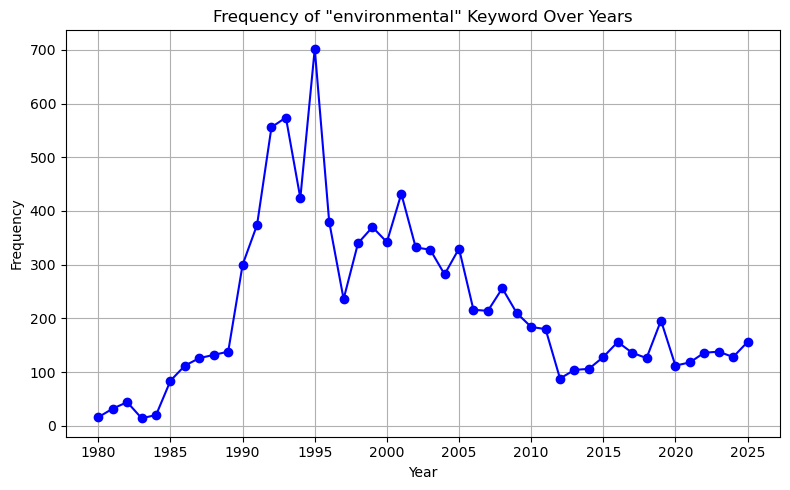

In [166]:
import matplotlib.pyplot as plt

# Assuming your dataframe is named `summary`
# and already filtered to only the keyword/environmental as needed

# Ensure year and frequency are sorted and as integer types
summary = summary.sort_values('year')
summary['year'] = summary['year'].astype(int)

years = summary['year']
frequencies = summary['frequency']

plt.figure(figsize=(8, 5))
plt.plot(years, frequencies, marker='o', color='blue')
plt.title('Frequency of "environmental" Keyword Over Years')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Set x-ticks to show every 5 years between your min and max year
plt.xticks(ticks=range(summary['year'].min(), summary['year'].max()+1, 5))

plt.grid(True)
plt.tight_layout()
plt.show()


FOR bertopic

In [167]:
doc_topic_df = pd.DataFrame({'GOID': docs, 'Topic': topics})

In [168]:
doc_topic_df.head()

,GOID,Topic
0,423968056,6
1,423987935,6
2,423991776,3
3,424019341,2
4,424018521,0


In [169]:
doc_topic_df.shape

(5054, 2)

In [170]:
doc_topic_df.dtypes

GOID     object
Topic     int64
dtype: object

In [171]:
print(new_df.head())

        GOID        Date
0  433375738  2006-08-31
1  433422646  2006-10-31
2  433462991  2006-12-28
3  433470077  2006-12-11
4  433481259  2007-01-30


In [172]:
new_df['GOID'] = new_df['GOID'].astype(str)

In [173]:
new_df.dtypes

GOID    object
Date    object
dtype: object

In [174]:
import pandas as pd

# Merge DataFrames on 'GOID'
merged_df_bertopic = pd.merge(new_df, doc_topic_df[['GOID', 'Topic']], on='GOID', how='left')

In [175]:
merged_df_bertopic.head()

,GOID,Date,Topic
0,433375738,2006-08-31,4.0
1,433422646,2006-10-31,0.0
2,433462991,2006-12-28,7.0
3,433470077,2006-12-11,0.0
4,433481259,2007-01-30,7.0


In [176]:
# Make sure 'topic' is integer with no decimals
merged_df_bertopic['Topic'] = merged_df_bertopic['Topic'].astype('Int64') 

In [177]:
merged_df_bertopic.head()

,GOID,Date,Topic
0,433375738,2006-08-31,4
1,433422646,2006-10-31,0
2,433462991,2006-12-28,7
3,433470077,2006-12-11,0
4,433481259,2007-01-30,7


In [178]:
merged_df_bertopic.dtypes

GOID     object
Date     object
Topic     Int64
dtype: object

In [179]:
bert_words.head()

,topic,keyword,weight
0,0,animal,0.029024
1,0,wolf,0.026102
2,0,wildlife,0.021633
3,0,year,0.019916
4,0,state,0.016953


In [180]:
bert_words.dtypes

topic        int64
keyword     object
weight     float64
dtype: object

In [181]:
# 1. Make column names consistent (e.g., rename Topic to topic)
merged_df_bertopic = merged_df_bertopic.rename(columns={'Topic': 'topic'})

# # 2. Ensure both 'topic' columns are the same data type (e.g., int)
# merged_df_bertopic['topic'] = merged_df_bertopic['topic'].astype(int)
# bert_words['topic'] = bert_words['topic'].astype(int)

# 3. Merge on the topic column
merged_df_new_bertopic = pd.merge(merged_df_bertopic, bert_words[['topic', 'keyword']], on='topic', how='left')


In [182]:
merged_df_new_bertopic.head()

,GOID,Date,topic,keyword
0,433375738,2006-08-31,4,environmental
1,433375738,2006-08-31,4,federal
2,433375738,2006-08-31,4,year
3,433375738,2006-08-31,4,administration
4,433375738,2006-08-31,4,agency


In [183]:
# Ensure your 'Date' column is datetime type and extract year
merged_df_new_bertopic['year'] = pd.to_datetime(merged_df_new_bertopic['Date']).dt.year

# Filter for the keyword of interest
df_env = merged_df_new_bertopic[merged_df_new_bertopic['keyword'] == 'environmental']

# Group by year and aggregate frequency and unique topics
summary_bertopic = df_env.groupby('year').agg(
    frequency=('keyword', 'count'),
    num_topics=('topic', 'nunique')
).reset_index()

# Add the constant 'environmental' keyword column (for your preferred format)
summary_bertopic['keyword'] = 'environmental'
summary_bertopic['method'] = 'Bertopic'

# Reorder columns if desired
summary_bertopic = summary_bertopic[['year', 'keyword', 'frequency', 'num_topics','method']]

summary_bertopic.head()


,year,keyword,frequency,num_topics,method
0,1980,environmental,1,1,Bertopic
1,1981,environmental,2,1,Bertopic
2,1982,environmental,5,2,Bertopic
3,1983,environmental,1,1,Bertopic
4,1984,environmental,1,1,Bertopic


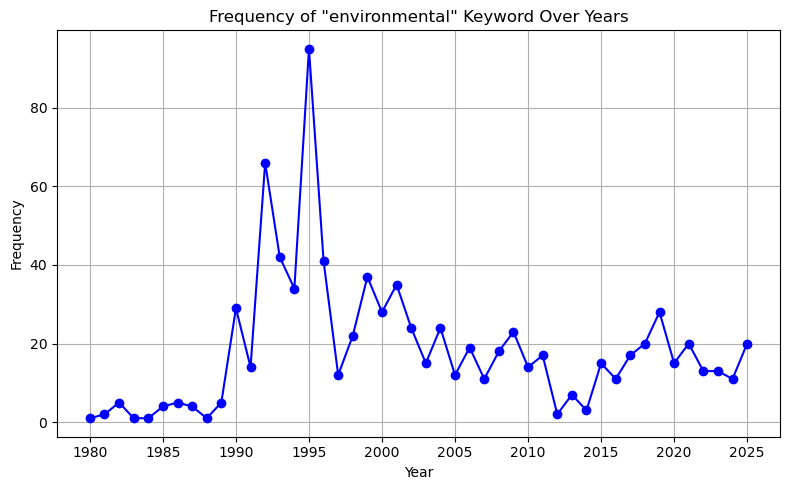

In [184]:
import matplotlib.pyplot as plt

# Assuming your dataframe is named `summary`
# and already filtered to only the keyword/environmental as needed

# Ensure year and frequency are sorted and as integer types
summary_bertopic = summary_bertopic.sort_values('year')
summary_bertopic['year'] = summary_bertopic['year'].astype(int)

years = summary_bertopic['year']
frequencies = summary_bertopic['frequency']

plt.figure(figsize=(8, 5))
plt.plot(years, frequencies, marker='o', color='blue')
plt.title('Frequency of "environmental" Keyword Over Years')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Set x-ticks to show every 5 years between your min and max year
plt.xticks(ticks=range(summary['year'].min(), summary['year'].max()+1, 5))

plt.grid(True)
plt.tight_layout()
plt.show()


In [185]:
# Concatenate both DataFrames
combined_df = pd.concat([summary, summary_bertopic], ignore_index=True)

In [186]:
combined_df.head()

,year,keyword,frequency,num_topics,method
0,1980,environmental,16,2,STM
1,1981,environmental,32,2,STM
2,1982,environmental,44,2,STM
3,1983,environmental,14,2,STM
4,1984,environmental,20,2,STM


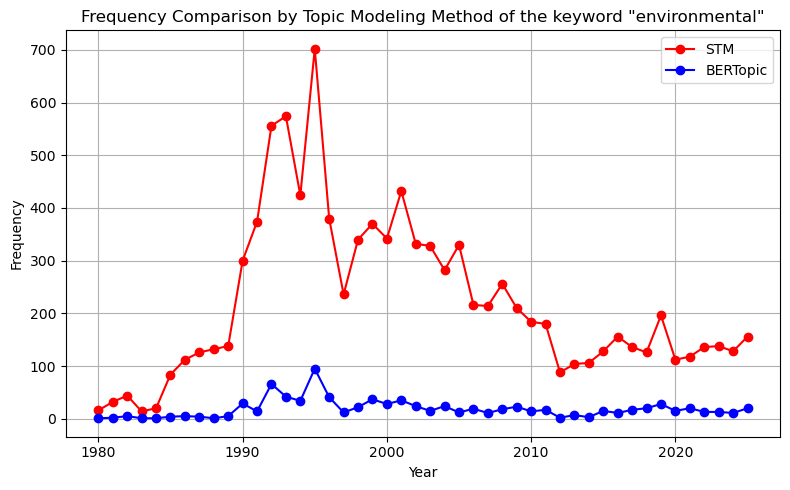

In [187]:
# Assuming you have a single dataframe 'combined_df' with columns: year, frequency, method
stm_df = combined_df[combined_df['method'] == 'STM']
bert_df = combined_df[combined_df['method'] == 'Bertopic']

plt.figure(figsize=(8, 5))

# Plot STM (red)
plt.plot(stm_df['year'], stm_df['frequency'], marker='o', color='red', label='STM')

# Plot BERTopic (blue)
plt.plot(bert_df['year'], bert_df['frequency'], marker='o', color='blue', label='BERTopic')

plt.title('Frequency Comparison by Topic Modeling Method of the keyword "environmental"')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [188]:
#get a dataframe for only topic  in STM

stm_gamma = pd.read_csv("stm_gamma.csv")
stm_gamma.head(10)

,Unnamed: 0,GOID,topic,gamma
0,1,423968056,1,0.002298
1,2,423987935,1,0.001456
2,3,423991776,1,0.494546
3,4,424019341,1,0.352611
4,5,424018521,1,0.028845
5,6,424019099,1,0.004112
6,7,424026006,1,0.230182
7,8,424027746,1,0.438587
8,9,424041203,1,0.068763
9,10,424040034,1,0.000948


In [189]:
# Make sure the column names match exactly; e.g., 'GOID', 'topic', 'gamma'
# Keep only the row with the highest gamma per GOID
best_topic_per_goid = stm_gamma.loc[stm_gamma.groupby('GOID')['gamma'].idxmax()].reset_index(drop=True)

print(best_topic_per_goid.head())

   Unnamed: 0       GOID  topic     gamma
0       47716  109846173     10  0.378097
1       44429  276285002      9  0.604291
2       44430  276531081      9  0.702650
3         265  280504819      1  0.532866
4       15434  280508448      4  0.461570


In [190]:
best_topic_per_goid.dtypes

Unnamed: 0      int64
GOID            int64
topic           int64
gamma         float64
dtype: object

In [191]:
best_topic_per_goid['GOID'] = best_topic_per_goid['GOID'].astype(str)

In [192]:
best_topic_per_goid.dtypes

Unnamed: 0      int64
GOID           object
topic           int64
gamma         float64
dtype: object

In [193]:
new_df.head()

,GOID,Date
0,433375738,2006-08-31
1,433422646,2006-10-31
2,433462991,2006-12-28
3,433470077,2006-12-11
4,433481259,2007-01-30


In [194]:
new_df.dtypes

GOID    object
Date    object
dtype: object

In [195]:
# Merge best_topic_per_goid with new_df on 'GOID'
best_topic_per_goid_merged = best_topic_per_goid.merge(new_df, on='GOID', how='left')

print(best_topic_per_goid_merged.head())


   Unnamed: 0       GOID  topic     gamma        Date
0       47716  109846173     10  0.378097  1998-08-02
1       44429  276285002      9  0.604291  2010-05-14
2       44430  276531081      9  0.702650  2010-05-15
3         265  280504819      1  0.532866  1988-08-31
4       15434  280508448      4  0.461570  1988-09-22


In [196]:
count_topic_1 = best_topic_per_goid[best_topic_per_goid['topic'] == 1].shape[0]
print(count_topic_1)

568


In [197]:
merged_df_bertopic.head()

,GOID,Date,topic
0,433375738,2006-08-31,4
1,433422646,2006-10-31,0
2,433462991,2006-12-28,7
3,433470077,2006-12-11,0
4,433481259,2007-01-30,7


In [198]:
count_topic_0 = merged_df_bertopic[merged_df_bertopic['topic'] == 3].shape[0]
print(count_topic_0)

621


In [199]:
merged_df_bertopic.shape

(5241, 3)

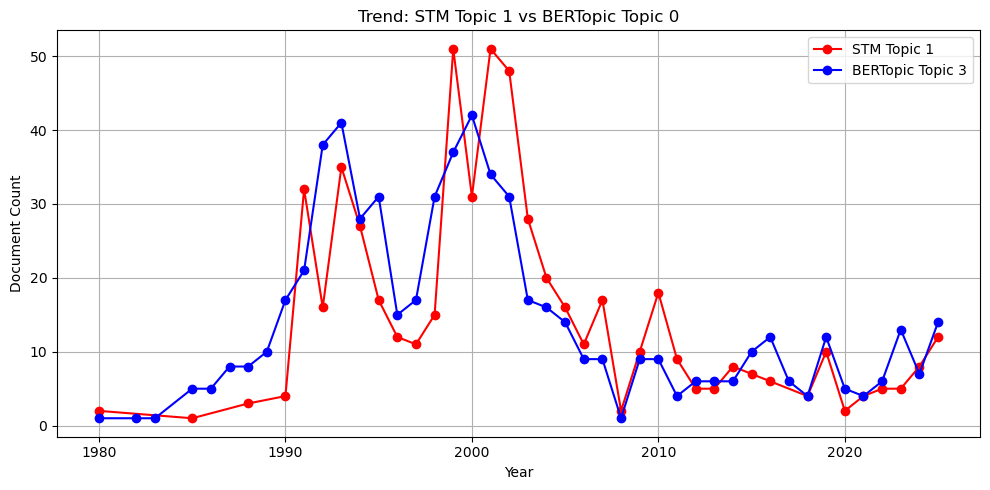

In [200]:
import pandas as pd
import matplotlib.pyplot as plt

# STM
stm_df = best_topic_per_goid_merged.copy()
stm_df['year'] = pd.to_datetime(stm_df['Date']).dt.year
stm_topic1 = stm_df[stm_df['topic'] == 1]
stm_counts = stm_topic1.groupby('year').size()

# BERTopic
bert_df = merged_df_bertopic.copy()
bert_df['year'] = pd.to_datetime(bert_df['Date']).dt.year
bert_topic0 = bert_df[bert_df['topic'] == 3]
bert_counts = bert_topic0.groupby('year').size()

# Plot
plt.figure(figsize=(10,5))
plt.plot(stm_counts.index, stm_counts.values, marker='o', color='red', label='STM Topic 1')
plt.plot(bert_counts.index, bert_counts.values, marker='o', color='blue', label='BERTopic Topic 3')
plt.xlabel('Year')
plt.ylabel('Document Count')
plt.title('Trend: STM Topic 1 vs BERTopic Topic 0')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [201]:
# Get the unique keywords from each word cloud
stm_keywords = set(stm_words['keyword'])
bert_keywords = set(bert_words['keyword'])

In [202]:
bert_keywords

{'activist',
 'administration',
 'affair',
 'agency',
 'alaska',
 'am',
 'animal',
 'appropriation',
 'approps',
 'bear',
 'bird',
 'bldg',
 'california',
 'case',
 'court',
 'dob',
 'environmental',
 'federal',
 'fish',
 'government',
 'grizzly',
 'group',
 'habitat',
 'house',
 'judge',
 'justice',
 'kill',
 'land',
 'law',
 'list',
 'make',
 'office',
 'park',
 'people',
 'plan',
 'pm',
 'polar',
 'population',
 'president',
 'protect',
 'protection',
 'republican',
 'rhob',
 'river',
 'salmon',
 'san',
 'sea',
 'service',
 'state',
 'subc',
 'threaten',
 'time',
 'us',
 'vote',
 'water',
 'wildlife',
 'wolf',
 'year'}

In [203]:
stm_keywords

{'a.m.',
 'administration',
 'agency',
 'american',
 'animal',
 'area',
 'bald',
 'bear',
 'bill',
 'bird',
 'breed',
 'butterfly',
 'california',
 'case',
 'clinton',
 'condor',
 'congress',
 'county',
 'court',
 'dam',
 'eagle',
 'environmental',
 'farmer',
 'federal',
 'fire',
 'fish',
 'forest',
 'grizzly',
 'habitat',
 'house',
 'hunt',
 'industry',
 'island',
 'kill',
 'land',
 'law',
 'list',
 'log',
 'make',
 'marine',
 'mountain',
 'nest',
 'office',
 'oil',
 'otter',
 'owl',
 'p.m.',
 'park',
 'people',
 'plan',
 'plant',
 'president',
 'protect',
 'protection',
 'republican',
 'river',
 'salmon',
 'school',
 'sea',
 'senate',
 'service',
 'state',
 'subc',
 'threaten',
 'timber',
 'time',
 'tree',
 'turtle',
 'u.s.',
 'vote',
 'water',
 'whale',
 'wildlife',
 'wolf',
 'work',
 'year'}

In [204]:
stm_keywords

{'a.m.',
 'administration',
 'agency',
 'american',
 'animal',
 'area',
 'bald',
 'bear',
 'bill',
 'bird',
 'breed',
 'butterfly',
 'california',
 'case',
 'clinton',
 'condor',
 'congress',
 'county',
 'court',
 'dam',
 'eagle',
 'environmental',
 'farmer',
 'federal',
 'fire',
 'fish',
 'forest',
 'grizzly',
 'habitat',
 'house',
 'hunt',
 'industry',
 'island',
 'kill',
 'land',
 'law',
 'list',
 'log',
 'make',
 'marine',
 'mountain',
 'nest',
 'office',
 'oil',
 'otter',
 'owl',
 'p.m.',
 'park',
 'people',
 'plan',
 'plant',
 'president',
 'protect',
 'protection',
 'republican',
 'river',
 'salmon',
 'school',
 'sea',
 'senate',
 'service',
 'state',
 'subc',
 'threaten',
 'timber',
 'time',
 'tree',
 'turtle',
 'u.s.',
 'vote',
 'water',
 'whale',
 'wildlife',
 'wolf',
 'work',
 'year'}

In [205]:
# Find words that appear in both sets (overlap)
similar_words = stm_keywords.intersection(bert_keywords)

In [206]:
similar_words

{'administration',
 'agency',
 'animal',
 'bear',
 'bird',
 'california',
 'case',
 'court',
 'environmental',
 'federal',
 'fish',
 'grizzly',
 'habitat',
 'house',
 'kill',
 'land',
 'law',
 'list',
 'make',
 'office',
 'park',
 'people',
 'plan',
 'president',
 'protect',
 'protection',
 'republican',
 'river',
 'salmon',
 'sea',
 'service',
 'state',
 'subc',
 'threaten',
 'time',
 'vote',
 'water',
 'wildlife',
 'wolf',
 'year'}

In [207]:
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

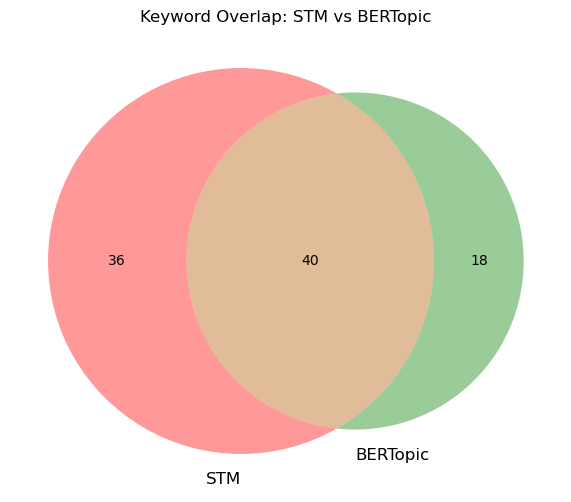

In [208]:
# Get unique keywords for each
stm_keywords = set(stm_words['keyword'])
bert_keywords = set(bert_words['keyword'])

# Create the Venn diagram
plt.figure(figsize=(8, 6))
venn2([stm_keywords, bert_keywords], set_labels=('STM', 'BERTopic'))
plt.title('Keyword Overlap: STM vs BERTopic')
plt.show()

In [209]:
# Filter documents where Topic is 2
topic_2_docs = doc_topic_df[doc_topic_df['Topic'] == 2]

# View the GOIDs of those documents
print(topic_2_docs)

            GOID  Topic
3      424019341      2
11     424050631      2
13     424105594      2
34     424365689      2
36     424363639      2
37     424352048      2
47     424662628      2
52     424852231      2
54     424927357      2
58     425130792      2
69     292037751      2
71     292036511      2
72     292077494      2
80     292147880      2
92     292121473      2
107    290897277      2
110    292295097      2
114    292256755      2
122    425821615      2
136    425915725      2
137    290937964      2
140    292331751      2
142    425930811      2
143    290944489      2
148    425958703      2
150    292436168      2
154    292312864      2
163    292495289      2
166    291002485      2
174    292704374      2
175    292703129      2
177    291018539      2
179    426470169      2
183    292502219      2
189    292634031      2
190    292650834      2
196    292618370      2
197    306907838      2
198    292605262      2
205    426651323      2
206    426649115

In [210]:
doc_topic_df.shape

(5054, 2)

In [211]:
df_wildlife_bertopic_keywords = pd.read_csv("wildlife_bertopic_keywords.csv")
print(df_wildlife_bertopic_keywords)

   topic  \
0      0   
1      1   
2      2   
3      3   
4      4   
5      5   
6      6   
7      7   
8      8   
9      9   

                                                                           keywords  
0                water, say, salmon, fish, state, agency, federal, year, dam, river  
1                       forest, timber, owl, land, say, log, tree, acre, plan, year  
2  say, year, state, spending, more, republican, bill, campaign, democratic, budget  
3   say, administration, regulation, bill, new, year, more, oil, gas, environmental  
4     court, case, law, say, justice, federal, conservative, decision, write, right  
5           vicuna, say, rebel, military, kill, war, leader, new, troop, government  
6            wolf, dog, hunt, say, animal, hunting, kill, ferret, state, population  
7     eagle, gnatcatcher, bird, developer, state, say, habitat, list, bald, federal  
8       owl, forest, timber, log, telescope, federal, spot, court, squirrel, permit  
9      

In [212]:
df_wildlife_STM_keywords = pd.read_csv("news_stm_topic_keywords.csv")
print(df_wildlife_STM_keywords)

     Topic   Top1           Top2   Top3      Top4        Top5      Top6  \
0   Topic1    say            oil   year     price         gas    report   
1   Topic2    say           fish    dam    salmon        year     power   
2   Topic3    say           bill  state      year  government       new   
3   Topic4  court            say    law      case     federal  decision   
4   Topic5    say  environmental  group   federal        year      many   
5   Topic6   land        habitat    say  property     federal      list   
6   Topic7    say         timber    log       owl      forest      tree   
7   Topic8    say           year   home  official        city    people   
8   Topic9    say           wolf   year    animal       state     eagle   
9  Topic10  water            say  state    salmon     federal    farmer   

      Top7        Top8        Top9             Top10  
0  company      market        bear              make  
1    river      agency     federal             water  
2      cu

Yes, using cosine similarity for comparing STM and BERTopic topic keywords—especially if you want to leverage embedding models (e.g., word2vec, spaCy, Sentence Transformers) to capture semantic similarity rather than just exact token overlap.

In [213]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load STM and BERTopic keywords CSVs as before
df_stm = pd.read_csv('news_stm_topic_keywords.csv')
df_bertopic = pd.read_csv('wildlife_bertopic_keywords.csv')


# Build strings, one per topic, with keywords joined by space
stm_topic_strs = [" ".join(str(word) for word in row[1:] if pd.notna(word)) for _, row in df_stm.iterrows()]
bertopic_topic_strs = df_bertopic['keywords'].astype(str).tolist()

# Sentence embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
stm_embeddings = model.encode(stm_topic_strs)
bertopic_embeddings = model.encode(bertopic_topic_strs)

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(stm_embeddings, bertopic_embeddings)
similarity_df = pd.DataFrame(similarity_matrix, 
                            index=[f'STM_{i+1}' for i in range(len(stm_embeddings))],
                            columns=[f'BERTopic_{i+1}' for i in range(len(bertopic_embeddings))])

print(similarity_df.round(2))




        BERTopic_1  BERTopic_2  BERTopic_3  BERTopic_4  BERTopic_5  \
STM_1         0.23        0.11        0.25        0.37        0.05   
STM_2         0.79        0.20        0.28        0.41        0.25   
STM_3         0.34        0.19        0.51        0.52        0.28   
STM_4         0.27        0.15        0.08        0.15        0.59   
STM_5         0.48        0.33        0.38        0.57        0.25   
STM_6         0.38        0.43        0.15        0.22        0.15   
STM_7         0.31        0.66        0.17        0.29        0.22   
STM_8         0.30        0.21        0.33        0.36        0.17   
STM_9         0.34        0.35        0.27        0.21        0.11   
STM_10        0.65        0.20        0.29        0.27        0.15   

        BERTopic_6  BERTopic_7  BERTopic_8  BERTopic_9  BERTopic_10  
STM_1        -0.06        0.08        0.18        0.06         0.21  
STM_2         0.08        0.21        0.37        0.23         0.25  
STM_3         0.06 

Each cell in similarity_df shows the semantic similarity between a given STM topic’s keyword set and a BERTopic topic’s keyword set.

Values close to 1 indicate high semantic similarity, even if the exact keywords differ.

In [214]:
print(similarity_df.idxmax(axis=1))
print(similarity_df.max(axis=1))

STM_1     BERTopic_4
STM_2     BERTopic_1
STM_3     BERTopic_4
STM_4     BERTopic_5
STM_5     BERTopic_4
STM_6     BERTopic_8
STM_7     BERTopic_2
STM_8     BERTopic_4
STM_9     BERTopic_7
STM_10    BERTopic_1
dtype: object
STM_1     0.367514
STM_2     0.794309
STM_3     0.521963
STM_4     0.594448
STM_5     0.566837
STM_6     0.673257
STM_7     0.655644
STM_8     0.358892
STM_9     0.678311
STM_10    0.651985
dtype: float32


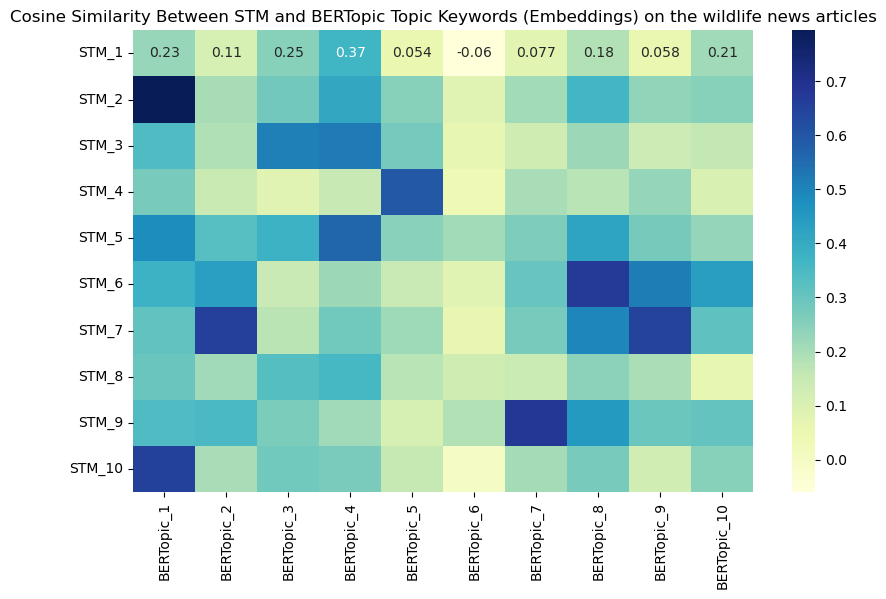

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(similarity_df, annot=True, cmap="YlGnBu")
plt.title("Cosine Similarity Between STM and BERTopic Topic Keywords (Embeddings) on the wildlife news articles")
plt.show()


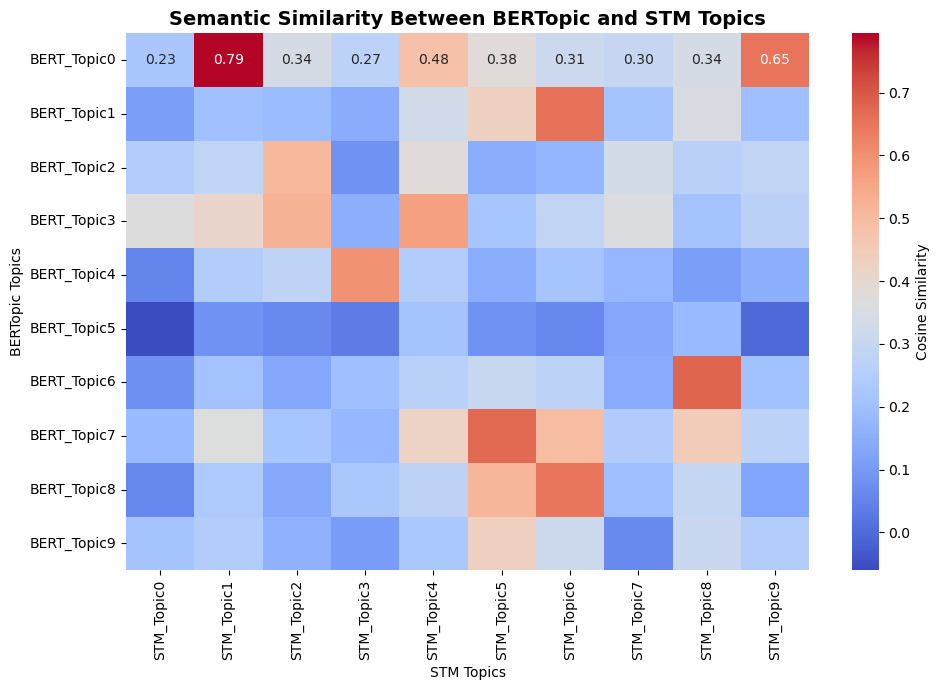

In [216]:
# --- STEP 1: Import libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer, util

# --- STEP 2: Load your data ---
# (Already available in your project)
df_bertopic = pd.read_csv("wildlife_bertopic_keywords.csv")
df_stm = pd.read_csv("news_stm_topic_keywords.csv")

# --- STEP 3: Prepare topic strings ---
# For STM, combine Top words into one string per topic
df_stm['keywords'] = df_stm[['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9', 'Top10']].apply(
    lambda x: ' '.join(x.dropna().astype(str)), axis=1
)

# --- STEP 4: Encode keywords using a SentenceTransformer model ---
model = SentenceTransformer('all-MiniLM-L6-v2')

bertopic_embeddings = model.encode(df_bertopic['keywords'].tolist(), convert_to_tensor=True)
stm_embeddings = model.encode(df_stm['keywords'].tolist(), convert_to_tensor=True)

# --- STEP 5: Compute cosine similarity matrix ---
similarity_matrix = util.cos_sim(bertopic_embeddings, stm_embeddings).cpu().numpy()

# --- STEP 6: Create a DataFrame for visualization ---
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=[f"BERT_Topic{i}" for i in range(len(df_bertopic))],
    columns=[f"STM_Topic{i}" for i in range(len(df_stm))]
)

# --- STEP 7: Plot the heatmap ---
plt.figure(figsize=(10, 7))
sns.heatmap(similarity_df, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Cosine Similarity'})
plt.title("Semantic Similarity Between BERTopic and STM Topics", fontsize=14, weight='bold')
plt.xlabel("STM Topics")
plt.ylabel("BERTopic Topics")
plt.tight_layout()
plt.show()


Generating a topic similarity matrix, showing how closely STM and BERTopic themes align semantically.

In [217]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd

# Load data
bertopic_df = pd.read_csv("wildlife_bertopic_keywords.csv")
stm_df = pd.read_csv("news_stm_topic_keywords.csv")

# Choose model for embedding
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode keywords
bertopic_embeds = model.encode(bertopic_df['keywords'], convert_to_tensor=True)
stm_topics = stm_df[['Top1','Top2','Top3','Top4','Top5']].apply(lambda x: ' '.join(x), axis=1)
stm_embeds = model.encode(stm_topics, convert_to_tensor=True)

# Compute similarity matrix
similarity = util.cos_sim(bertopic_embeds, stm_embeds)

# Create readable comparison table
import numpy as np
comparison = pd.DataFrame(
    np.round(similarity.cpu().numpy(), 2),
    index=[f"BERT_Topic{i}" for i in range(len(bertopic_df))],
    columns=[f"STM_Topic{i}" for i in range(len(stm_df))]
)
print(comparison)


             STM_Topic0  STM_Topic1  STM_Topic2  STM_Topic3  STM_Topic4  \
BERT_Topic0        0.25        0.66        0.53        0.23        0.52   
BERT_Topic1        0.15        0.20        0.34        0.14        0.40   
BERT_Topic2        0.37        0.31        0.62        0.03        0.42   
BERT_Topic3        0.48        0.29        0.61        0.13        0.57   
BERT_Topic4        0.06        0.12        0.35        0.53        0.24   
BERT_Topic5        0.01        0.03        0.18        0.03        0.12   
BERT_Topic6        0.05        0.19        0.27        0.16        0.24   
BERT_Topic7        0.08        0.23        0.28        0.14        0.38   
BERT_Topic8        0.01        0.06        0.23        0.24        0.29   
BERT_Topic9        0.26        0.27        0.18        0.04        0.21   

             STM_Topic5  STM_Topic6  STM_Topic7  STM_Topic8  STM_Topic9  
BERT_Topic0        0.39        0.25        0.32        0.31        0.63  
BERT_Topic1        0.41   

In [218]:
import pandas as pd

# Read CSVs of keywords from STM and BERTopic
df_stm = pd.read_csv("news_stm_topic_keywords.csv")
df_bertopic = pd.read_csv("wildlife_bertopic_keywords.csv")

# For STM: collect top keywords per topic into sets
stm_topic_keywords = []
for i, row in df_stm.iterrows():
    # Exclude "Topic" column, keep Top1 ... Top10
    stm_keywords = set(str(val).strip() for col, val in row.items() if col.startswith('Top'))
    stm_topic_keywords.append(stm_keywords)

# For BERTopic: split keywords string into sets
bertopic_topic_keywords = []
for i, row in df_bertopic.iterrows():
    keywords = [k.strip() for k in str(row['keywords']).split(',')]
    bertopic_topic_keywords.append(set(keywords))


In [219]:
import numpy as np

# Initialize results matrix STM_topics x BERTopic_topics
n_stm = len(stm_topic_keywords)
n_bertopic = len(bertopic_topic_keywords)
similarity_matrix = np.zeros((n_stm, n_bertopic))

# Fill matrix with Jaccard similarity between topic keyword sets
for i, stm_set in enumerate(stm_topic_keywords):
    for j, bert_set in enumerate(bertopic_topic_keywords):
        intersection = stm_set & bert_set
        union = stm_set | bert_set
        similarity = len(intersection) / len(union) if union else 0.0
        similarity_matrix[i, j] = similarity

# Make a DataFrame to easily view
jaccard_df = pd.DataFrame(similarity_matrix,
                          index=[f"STM_{i+1}" for i in range(n_stm)],
                          columns=[f"BERTopic_{i+1}" for i in range(n_bertopic)])

print(jaccard_df.round(2))


        BERTopic_1  BERTopic_2  BERTopic_3  BERTopic_4  BERTopic_5  \
STM_1         0.11        0.11        0.11        0.24        0.05   
STM_2         0.75        0.11        0.11        0.11        0.11   
STM_3         0.17        0.11        0.31        0.31        0.05   
STM_4         0.17        0.05        0.11        0.05        0.50   
STM_5         0.31        0.11        0.17        0.24        0.11   
STM_6         0.17        0.11        0.11        0.05        0.11   
STM_7         0.11        0.62        0.05        0.05        0.11   
STM_8         0.17        0.11        0.17        0.17        0.05   
STM_9         0.17        0.11        0.17        0.11        0.05   
STM_10        0.62        0.17        0.17        0.11        0.11   

        BERTopic_6  BERTopic_7  BERTopic_8  BERTopic_9  BERTopic_10  
STM_1         0.05        0.05        0.05        0.00         0.17  
STM_2         0.05        0.05        0.11        0.05         0.05  
STM_3         0.17 

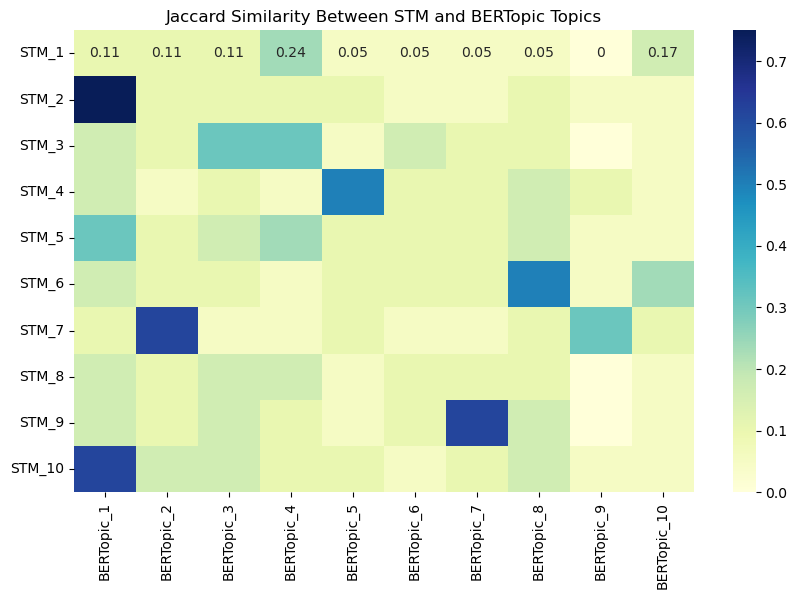

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(jaccard_df, annot=True, cmap="YlGnBu")
plt.title("Jaccard Similarity Between STM and BERTopic Topics")
plt.show()


In [221]:
#for congress
df_congress = pd.read_csv("congress_filtered.csv")
#df_congress.head()

In [222]:

# Show full content of each column (no truncation)
pd.set_option('display.max_colwidth', None)

# Show full rows and columns if needed
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)